# Метод линейной регрессии на сгенерированном датасете
### Содержание
1. [Немного теории](#Немного-теории)
2. [Подключение библиотек и генерация датасета](#Подключение-библиотек-и-генерация-датасета)
3. [Разделение данных на тренировочную и тестовую выборки](#Разделение-данных-на-тренировочную-и-тестовую-выборки)
4. [Обучение модели и оценка точности](#Обучение-модели-и-оценка-точности)
5. [Прогнозирование](#Прогнозирование)
6. [Получившиеся весовые коэффициенты 𝜔, свободный член 𝑏](#Получившиеся-весовые-коэффициенты-$\omega$,-свободный-член-$b$)
7. [Линия регрессии](#Линия-регрессии)

### Немного теории
Линейная регрессия — метод восстановления зависимости одной (объясняемой, зависимой) переменной $y$ от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) $x$ с линейной функцией зависимости. Данный метод позволяет предсказывать значения зависимой переменной $y$ по значениям независимой переменной $x$. 

Множественная линейная регрессионная модель имеет следующий вид:

$$y=\omega_0 x_0 + \omega_1 x_1 +...+ \omega_n x_n + b$$

Здесь:
* $\omega_i$ — весовые параметры (коэффициенты) регрессии;
* $x_i$ — регрессоры модели (признаки определенного сэмпла);
* $b$ — свободный член;
* $y$ — результат предсказания.

Подробнее о линейной регрессии можно почитать в гугле, например, [тут](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F), [тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%28%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%29), [тут](https://proglib.io/p/linear-regression) и много где ещё.

### Подключение библиотек и генерация датасета

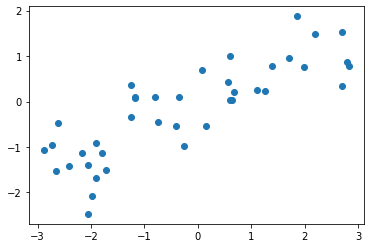

In [1]:
from matplotlib import pyplot as plt
from mglearn import datasets
import numpy as np

x, y  = datasets.make_wave(n_samples=40)

plt.scatter(x, y)
plt.show()

### Разделение данных на тренировочную и тестовую выборки

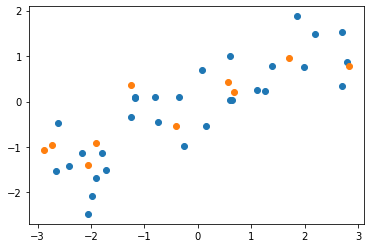

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()

### Обучение модели и оценка точности

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

print(f'Точность на тренировочных данных: {lr.score(X_train, y_train)}')
print(f'Точность на тестовых данных: {lr.score(X_test, y_test)}')

Точность на тренировочных данных: 0.6883322630458479
Точность на тестовых данных: 0.626150295776388


### Прогнозирование

In [4]:
#Передаем набор с тестовыми признаками для прогноза y
y_pred = lr.predict(X_test)

print(f"Метки тестового набора:\n{y_test}")
print(f"Прогнозы для тестового набора:\n{y_pred}")

Метки тестового набора:
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
Прогнозы для тестового набора:
[-0.74774302  0.2578853   0.80306544 -1.17592143 -1.60192362 -1.08978037
  0.1967429   1.38413782 -0.30800706 -1.5205635 ]


### Получившиеся весовые коэффициенты $\omega$, свободный член $b$
Для получения значений весовых коэффициентов $\omega_i$ обученной модели, а также свободного члена $b$, необходимо вызвать методы обученной модели `.coef_` и `.intercept_` соответственно:

In [5]:
print('lr coeff = {}'.format(lr.coef_))
print('lr intercept = {}'.format(lr.intercept_))

lr coeff = [0.52424272]
lr intercept = -0.09394309015377249


### Линия регрессии

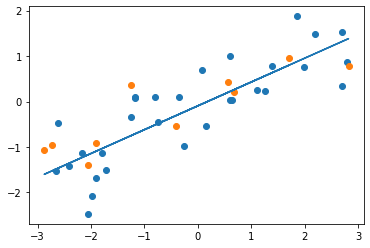

In [6]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

plt.plot(X_test, X_test*lr.coef_+lr.intercept_)

plt.show()